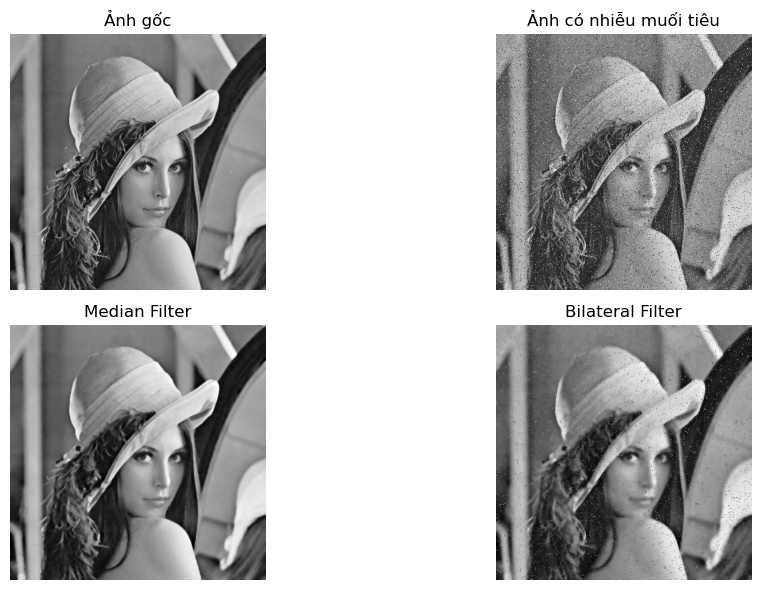

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Tải ảnh
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thêm nhiễu muối tiêu (salt & pepper noise)
noisy = gray.copy()
prob = 0.05
rnd = np.random.rand(*gray.shape)
noisy[rnd < prob/2] = 0
noisy[rnd > 1 - prob/2] = 255

# Áp dụng các lọc phi tuyến tính
median_filtered = cv2.medianBlur(noisy, 5)
bilateral_filtered = cv2.bilateralFilter(noisy, 9, 75, 75)

# Hiển thị kết quả
titles = ['Ảnh gốc', 'Ảnh có nhiễu muối tiêu', 'Median Filter', 'Bilateral Filter']
images = [gray, noisy, median_filtered, bilateral_filtered]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
